<a href="https://colab.research.google.com/github/rcardocg/11B/blob/master/Breast_Cancer_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparations

## Workframe Setup

In [1]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

# Kaggle setup
import kagglehub

## Dataset Preparations

In [2]:
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [3]:
raw_data = pd.read_csv(path + '/data.csv')
raw_data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
raw_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Drop the trash column
raw_data = raw_data.drop(columns=['Unnamed: 32'])
raw_data.shape

(569, 32)

In [6]:
# Drop Nulls
print(raw_data.isnull().sum())
raw_data = raw_data.dropna()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
raw_data.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


### Encoding

In [8]:
# prompt: Function to map values in the diagnosis column to an int (M = 0, B = 1)

def map_diagnosis(diagnosis):
    if diagnosis == 'M':
        return 0
    elif diagnosis == 'B':
        return 1
    else:
        return -1 # Handle cases where diagnosis is neither 'M' nor 'B'


raw_data['diagnosis'] = raw_data['diagnosis'].apply(map_diagnosis)


In [9]:
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Oversampling

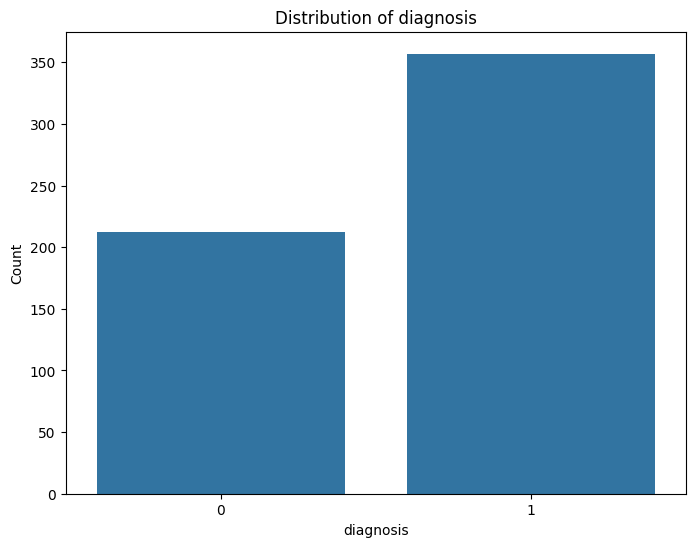

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=raw_data)
plt.title('Distribution of diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.show()

In [11]:
# Lets extract how many classes there ar in class 0
class_one_count = raw_data['diagnosis'].value_counts()[1]
class_one_count

# Oversample the data that belongs to class '0' (M)
oversampled_class_zero = raw_data[raw_data['diagnosis'] == 0].sample(class_one_count, replace=True)

oversampled_class_zero

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
218,8811842,0,19.80,21.56,129.7,1230.0,0.09383,0.1306,0.1272,0.08691,...,25.73,28.64,170.3,2009.0,0.1353,0.3235,0.3617,0.1820,0.3070,0.08255
236,88299702,0,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,...,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
131,8670,0,15.46,19.48,101.7,748.9,0.10920,0.1223,0.1466,0.08087,...,19.26,26.00,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019
446,9110732,0,17.75,28.03,117.3,981.6,0.09997,0.1314,0.1698,0.08293,...,21.53,38.54,145.4,1437.0,0.1401,0.3762,0.6399,0.1970,0.2972,0.09075
210,881046502,0,20.58,22.14,134.7,1290.0,0.09090,0.1348,0.1640,0.09561,...,23.24,27.84,158.3,1656.0,0.1178,0.2920,0.3861,0.1920,0.2909,0.05865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,89122,0,19.40,18.18,127.2,1145.0,0.10370,0.1442,0.1626,0.09464,...,23.79,28.65,152.4,1628.0,0.1518,0.3749,0.4316,0.2252,0.3590,0.07787
252,885429,0,19.73,19.82,130.7,1206.0,0.10620,0.1849,0.2417,0.09740,...,25.28,25.59,159.8,1933.0,0.1710,0.5955,0.8489,0.2507,0.2749,0.12970
219,88119002,0,19.53,32.47,128.0,1223.0,0.08420,0.1130,0.1145,0.06637,...,27.90,45.41,180.2,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568
516,916799,0,18.31,20.58,120.8,1052.0,0.10680,0.1248,0.1569,0.09451,...,21.86,26.20,142.2,1493.0,0.1492,0.2536,0.3759,0.1510,0.3074,0.07863


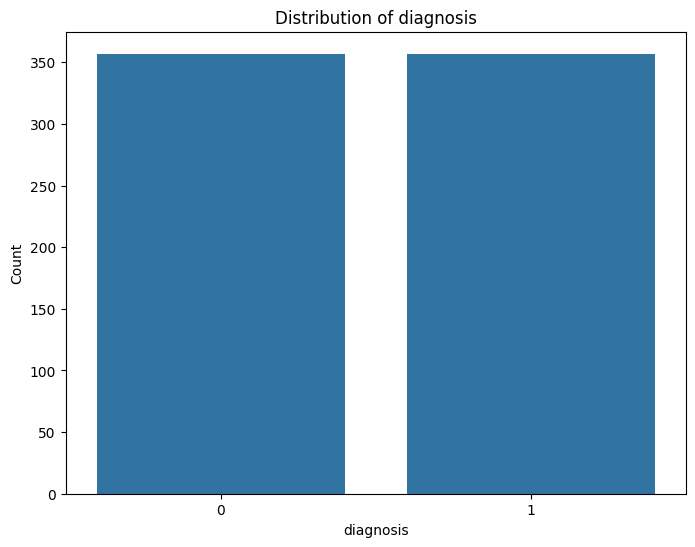

In [12]:
# Extract all the data with class 1
class_one_data = raw_data[raw_data['diagnosis'] == 1]

# Merge datasets
oversampled_dataset = pd.concat([oversampled_class_zero, class_one_data])

# Suffle the dataset
oversampled_dataset = oversampled_dataset.sample(frac=1).reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=oversampled_dataset)
plt.title('Distribution of diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.show()

## Normalization

In [13]:
def normalize_columns(df, columns_to_normalize):
    """Normalizes specified columns in a Pandas DataFrame.

    Args:
      df: The input DataFrame.
      columns_to_normalize: A list of column names to normalize.

    Returns:
      A new DataFrame with the specified columns normalized.
    """

    # Create a copy to avoid modifying the original DataFrame
    normalized_df = df.copy()

    for column in columns_to_normalize:
        if column in normalized_df.columns:
            min_val = normalized_df[column].min()
            max_val = normalized_df[column].max()
            normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)
        else:
            print(f"Warning: Column '{column}' not found in DataFrame.")

    return normalized_df
dataset_normalized = normalize_columns(oversampled_dataset, ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'])
dataset_normalized

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,88725602,0,0.404610,0.806561,0.414000,0.255317,0.484517,0.443286,0.410262,0.417445,...,0.419048,1.000000,0.424227,0.261735,0.773493,0.513345,0.455511,0.692096,0.462580,0.428703
1,8812877,0,0.415022,0.356442,0.406399,0.262280,0.450212,0.309858,0.268744,0.321173,...,0.461508,0.486940,0.421991,0.278058,0.554910,0.408175,0.317572,0.508247,0.576859,0.336875
2,84862001,0,0.433007,0.370984,0.444406,0.278200,0.581114,0.560763,0.403468,0.510934,...,0.517063,0.518657,0.482922,0.347973,0.711418,0.384211,0.382109,0.712371,0.508672,0.388036
3,9012568,1,0.388518,0.118363,0.372193,0.241265,0.243748,0.153242,0.079499,0.132058,...,0.328175,0.098881,0.302365,0.195238,0.273592,0.142048,0.108786,0.281031,0.219054,0.082776
4,87556202,0,0.372900,0.456544,0.391196,0.224114,0.467365,0.547880,0.397610,0.441252,...,0.323413,0.420043,0.381184,0.184643,0.399062,0.424474,0.366534,0.593471,0.340936,0.209694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,8911834,1,0.325098,0.184985,0.312349,0.188453,0.383949,0.176370,0.104944,0.184443,...,0.279762,0.259062,0.268098,0.149316,0.312554,0.140786,0.116294,0.343402,0.330245,0.092352
710,855625,0,0.572152,0.510653,0.583996,0.407769,0.344678,0.612294,0.493674,0.495080,...,0.641270,0.563699,0.709878,0.451460,0.353497,0.695744,0.578435,0.856701,0.737705,0.319822
711,909220,1,0.334091,0.212039,0.317808,0.198557,0.288435,0.121373,0.082802,0.146322,...,0.306746,0.254797,0.283917,0.173956,0.319157,0.094993,0.089217,0.256117,0.275600,0.113472
712,873843,1,0.209617,0.176192,0.205514,0.109743,0.342692,0.190694,0.144822,0.117346,...,0.176190,0.151386,0.160490,0.086855,0.270290,0.129726,0.131629,0.216357,0.058446,0.126131


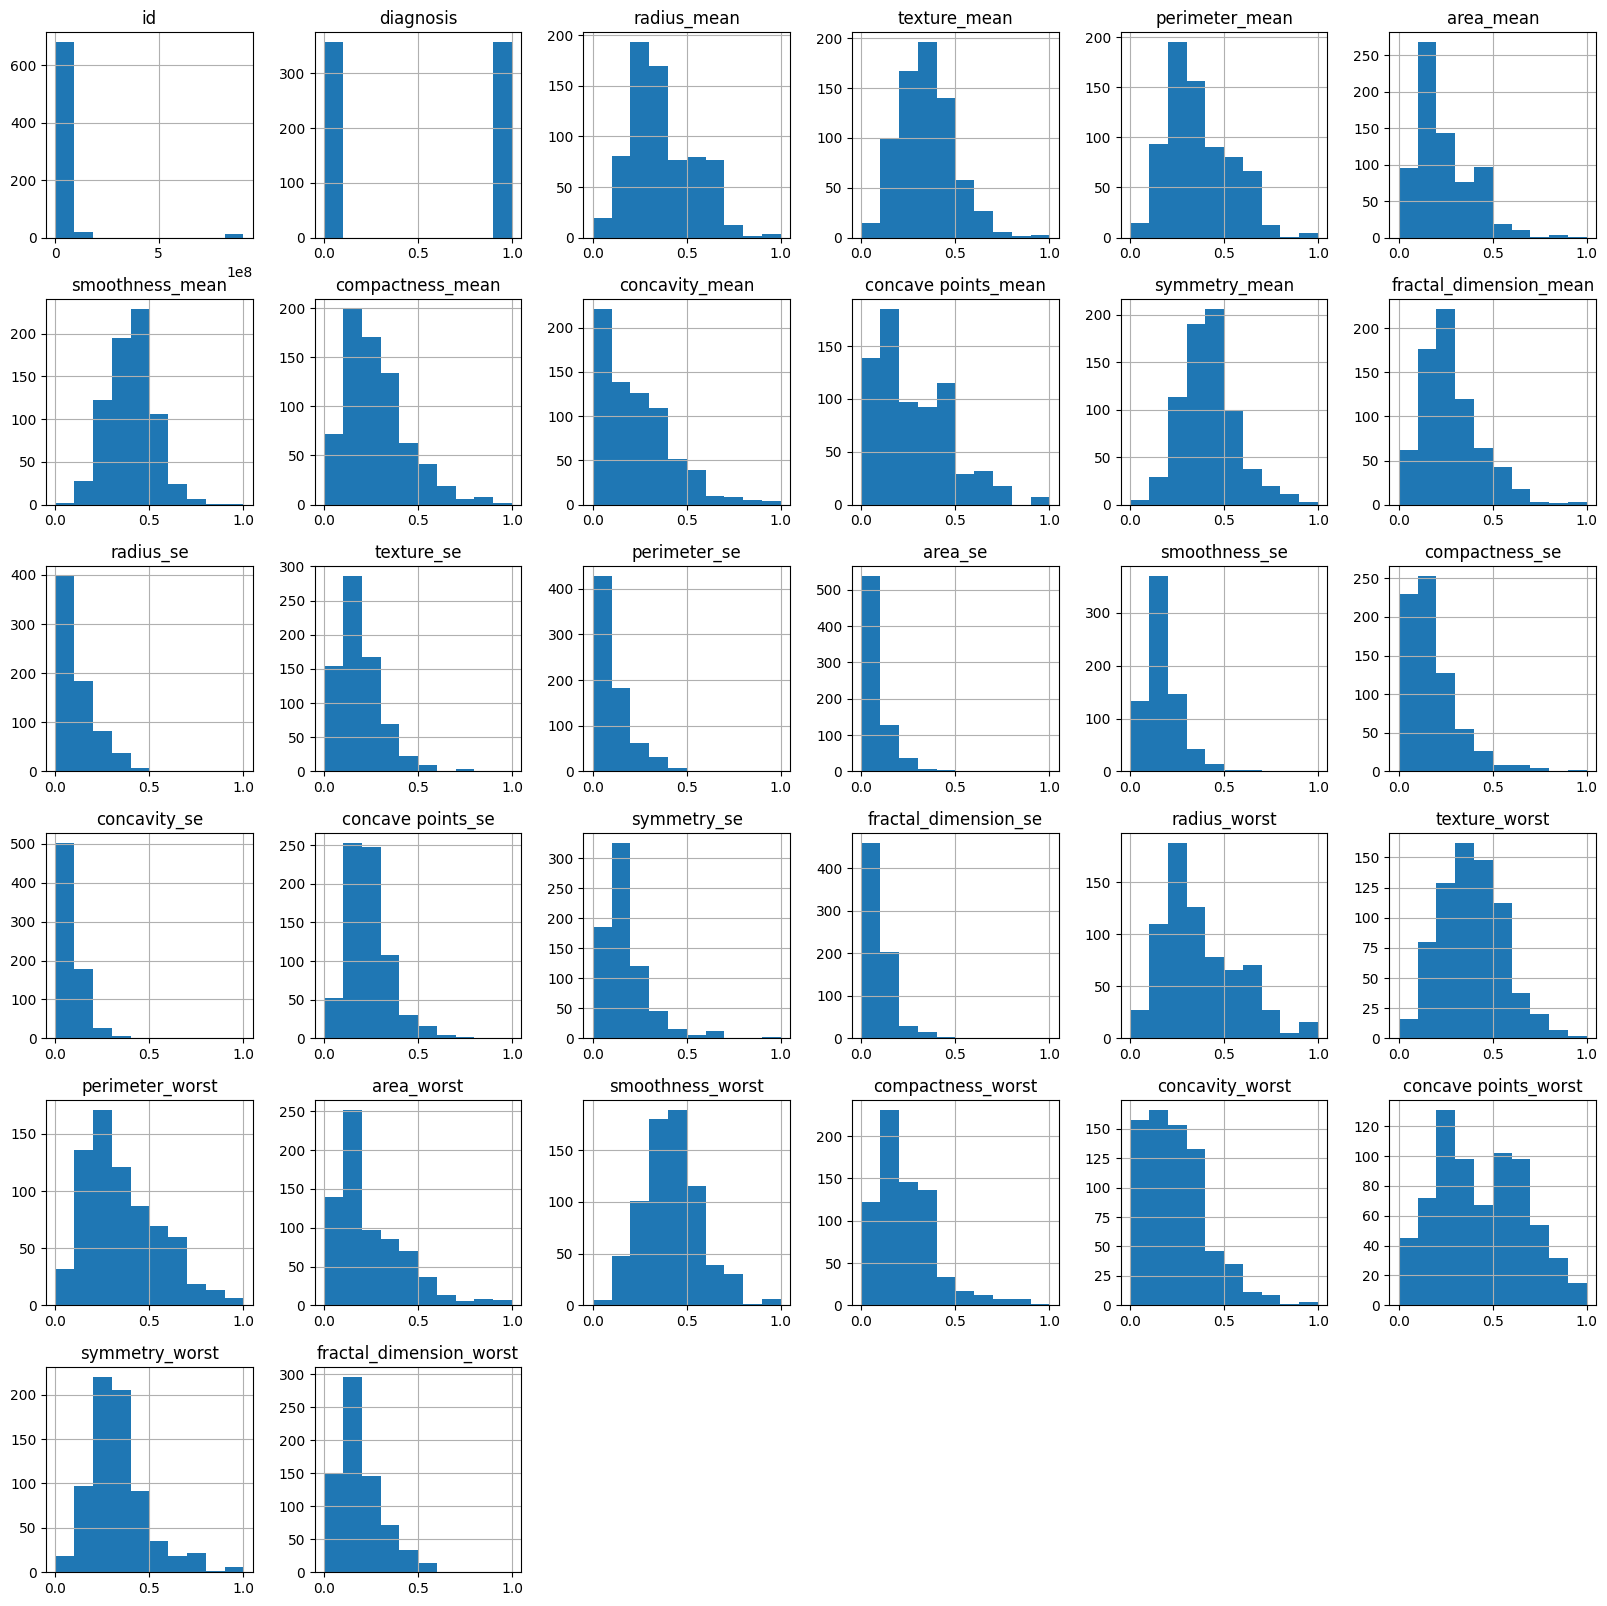

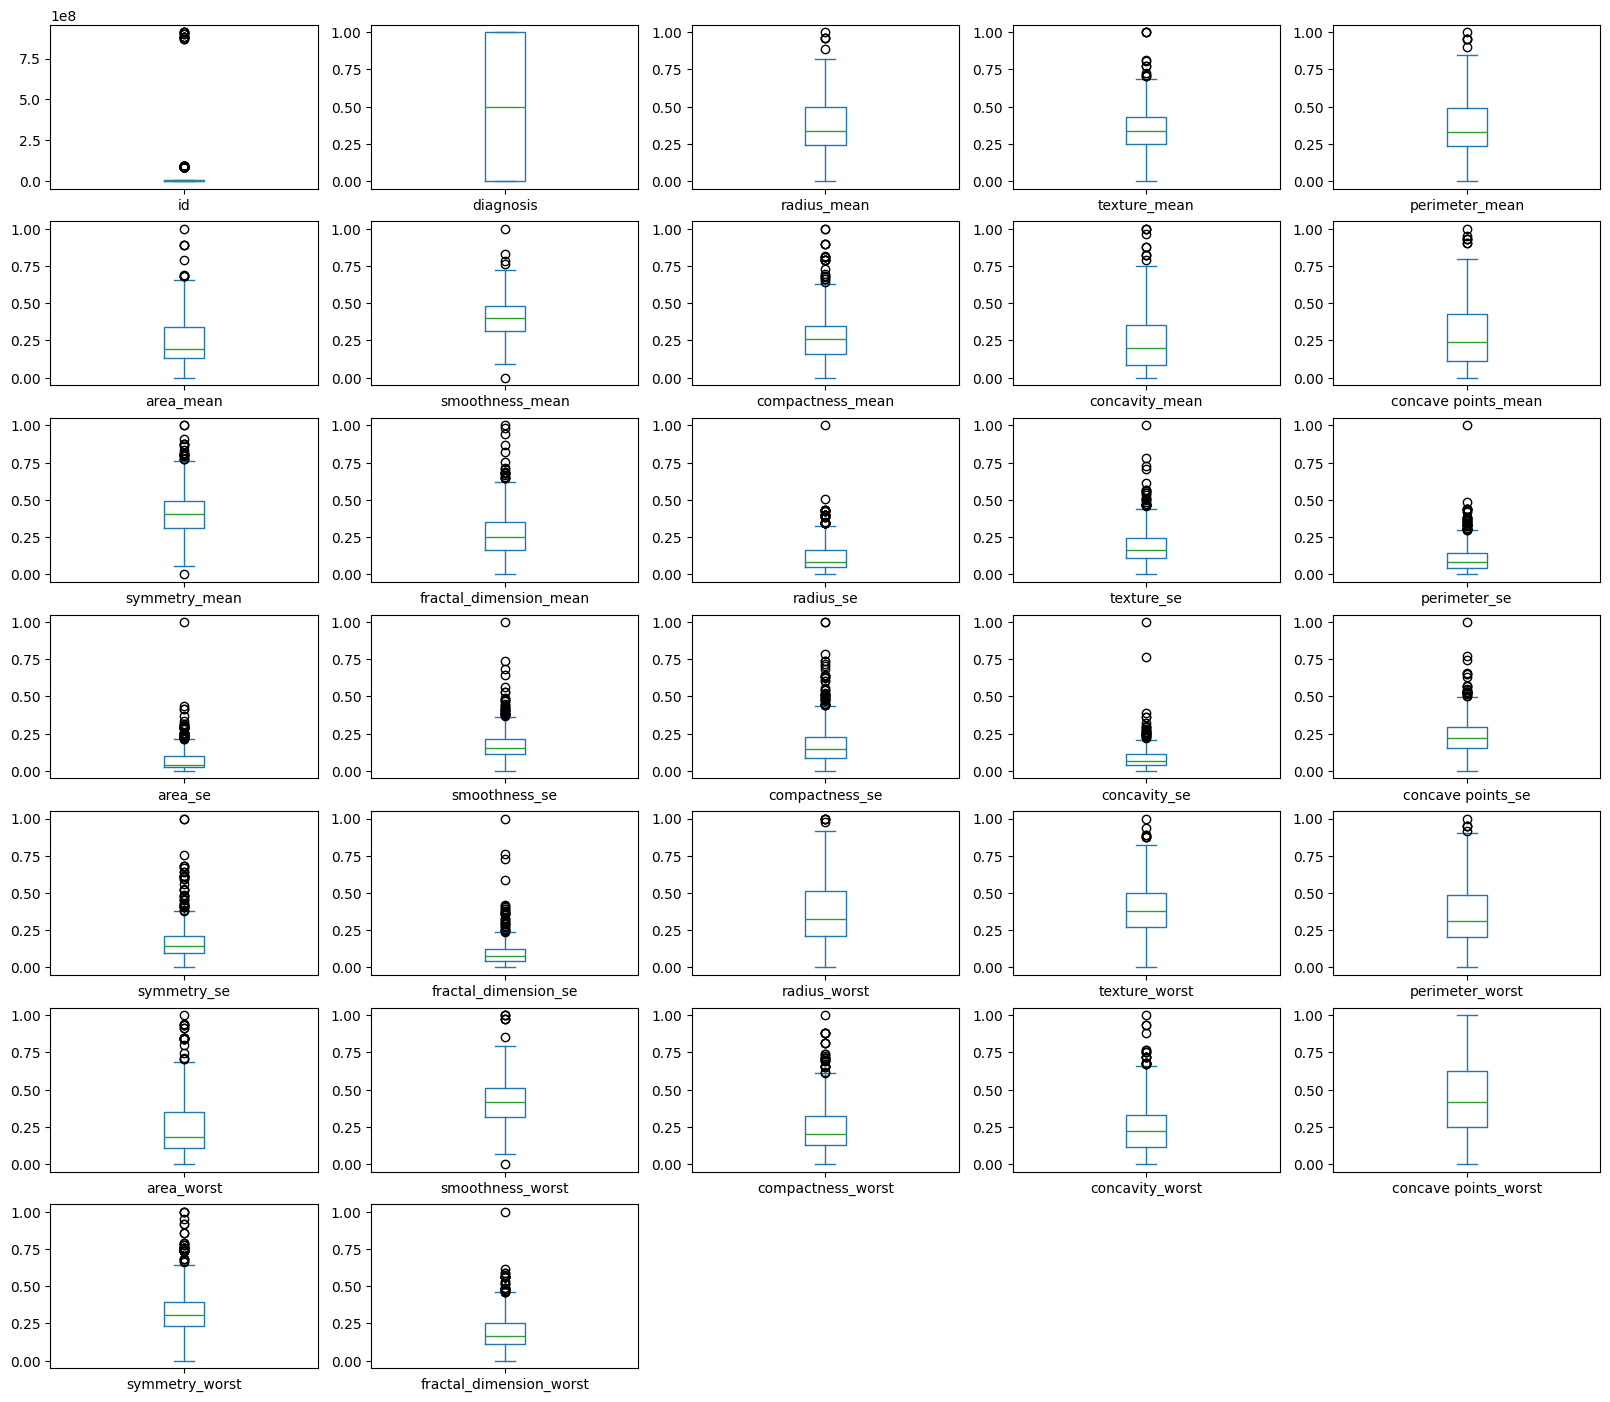

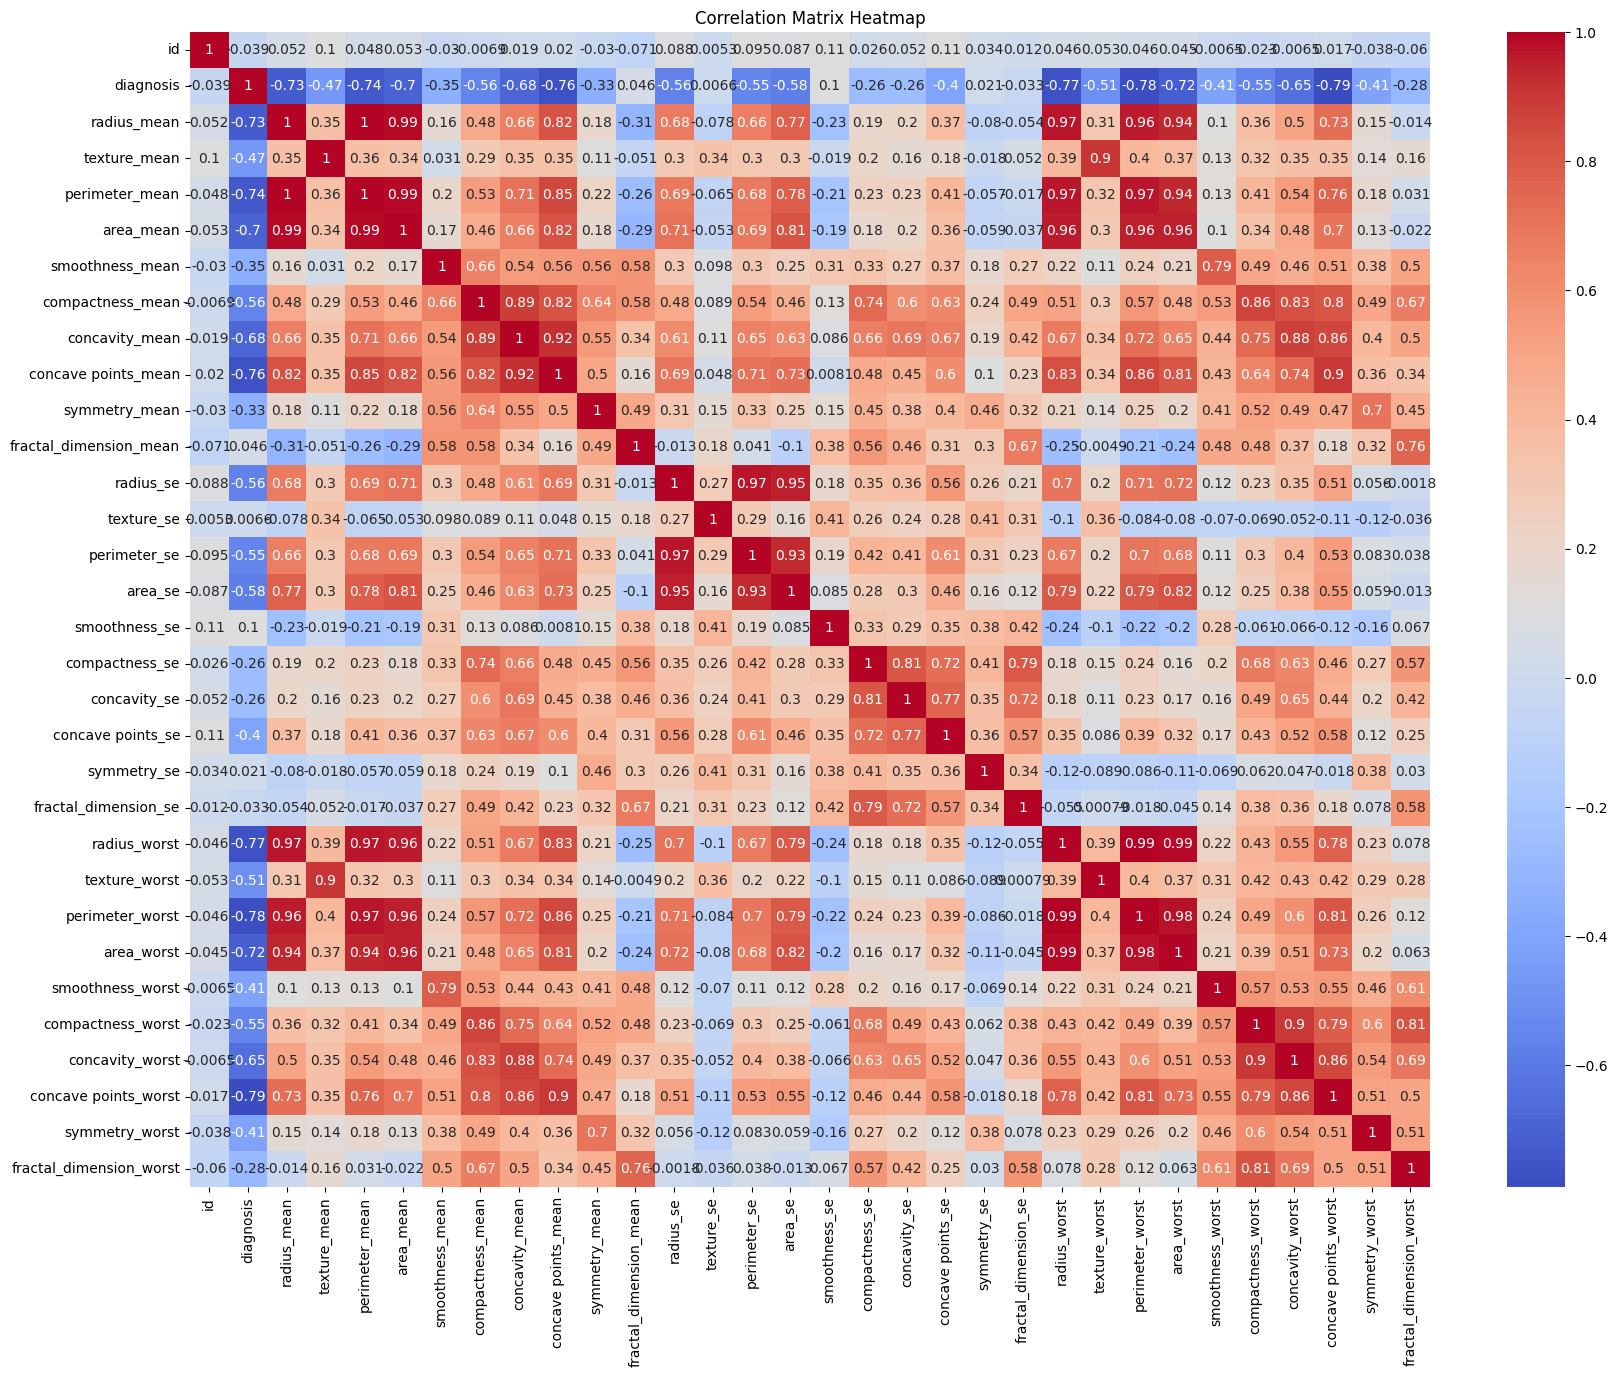

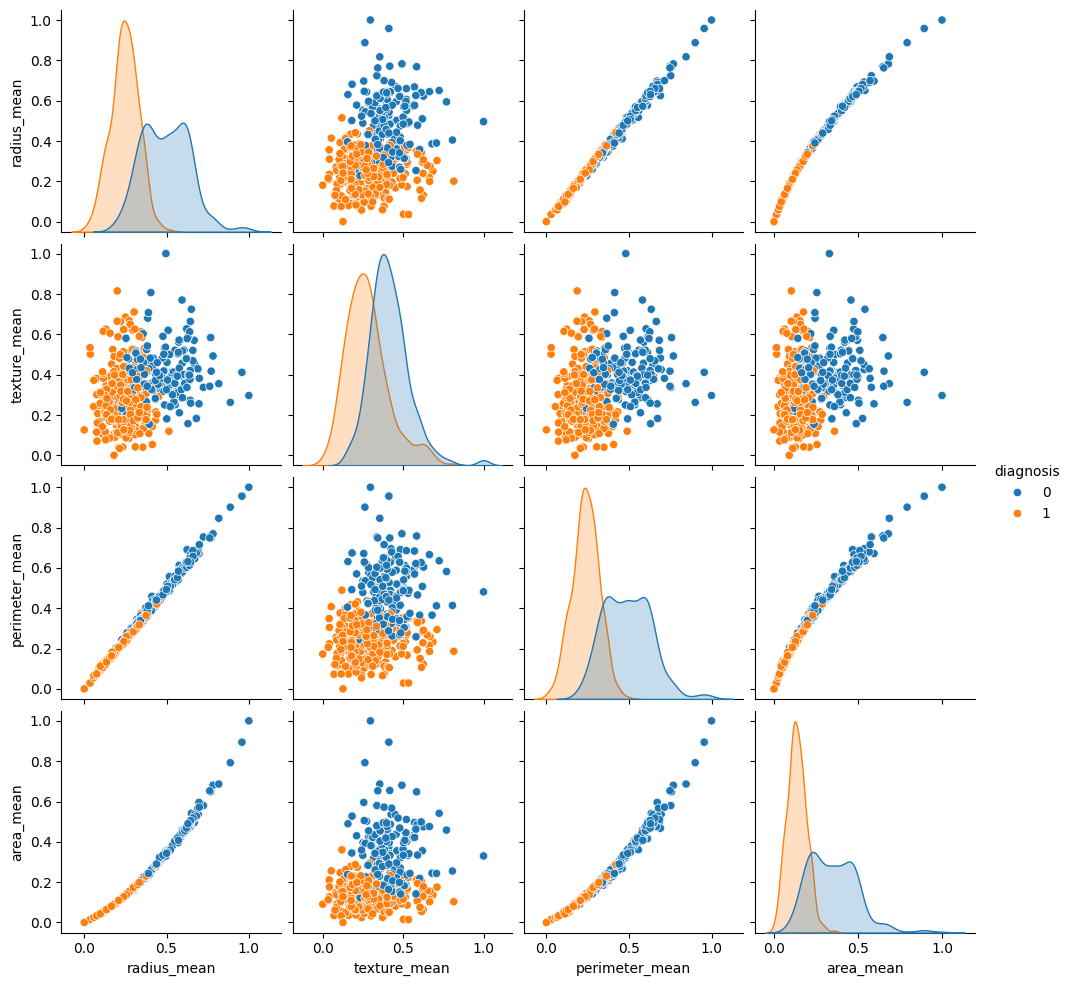

In [14]:
# Create histograms for each numerical feature
dataset_normalized.hist(figsize=(20, 20))
plt.show()

# Create boxplots for each numerical feature
dataset_normalized.plot(kind='box', subplots=True, layout=(8,5), sharex=False, sharey=False, figsize=(20,20))
plt.show()

# Create a correlation matrix heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(dataset_normalized.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Pairplot for a subset of features
sns.pairplot(dataset_normalized, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.show()

# Models

## First model

In [15]:
# Split the dataset into features (X) and target variable (y)
X = dataset_normalized.drop(columns=['diagnosis', 'id'])
y = dataset_normalized['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [38]:
#model
modelLeaky = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='leaky_relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compiling
modelLeaky.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# training
history = modelLeaky.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
#


Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5359 - loss: 0.9518 - val_accuracy: 0.6100 - val_loss: 0.6323
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9092 - loss: 0.2484 - val_accuracy: 0.6000 - val_loss: 0.5938
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9309 - loss: 0.1866 - val_accuracy: 0.6000 - val_loss: 0.5725
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9664 - loss: 0.1344 - val_accuracy: 0.6000 - val_loss: 0.5600
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9635 - loss: 0.1392 - val_accuracy: 0.6000 - val_loss: 0.5457
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9758 - loss: 0.1044 - val_accuracy: 0.6000 - val_loss: 0.5226
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9593 - loss: 0.1067 - val_accuracy: 0.6500 - val_loss: 0.5011
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9599 - loss: 0.1201 - val_accuracy: 0.6800 - val

In [39]:
loss, accuracy = modelLeaky.evaluate(X_train, y_train, verbose=0)
print(f"Train Loss: {loss:.4f}")
print(f"Train Accuracy: {accuracy:.4f}")

Train Loss: 0.1475
Train Accuracy: 0.9820


In [40]:
loss, accuracy = modelLeaky.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 0.1410
Test Accuracy: 0.9767


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


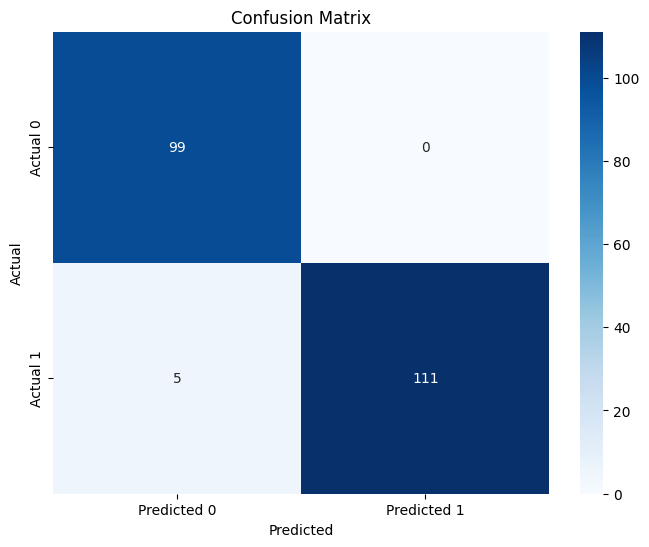

In [42]:
y_pred = modelLeaky.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Second model

In [44]:
#model
modelRelu = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compiling
modelRelu.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# training
history = modelRelu.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
#

Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6267 - loss: 0.7640 - val_accuracy: 0.6000 - val_loss: 0.6367
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8375 - loss: 0.3464 - val_accuracy: 0.6000 - val_loss: 0.6035
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9283 - loss: 0.1903 - val_accuracy: 0.6000 - val_loss: 0.5671
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9326 - loss: 0.1956 - val_accuracy: 0.6200 - val_loss: 0.5330
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9642 - loss: 0.1192 - val_accuracy: 0.6700 - val_loss: 0.5083
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9597 - loss: 0.1254 - val_accuracy: 0.6800 - val_loss: 0.4841
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9386 - loss: 0.1678 - val_accuracy: 0.7200 - val_loss: 0.4545
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9545 - loss: 0.1237 - val_accuracy: 0.7400 - val_los

In [45]:
loss, accuracy = modelRelu.evaluate(X_train, y_train, verbose=0)
print(f"Train Loss: {loss:.4f}")
print(f"Train Accuracy: {accuracy:.4f}")

Train Loss: 0.0812
Train Accuracy: 0.9880


In [46]:
loss, accuracy = modelRelu.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0770
Test Accuracy: 0.9860


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


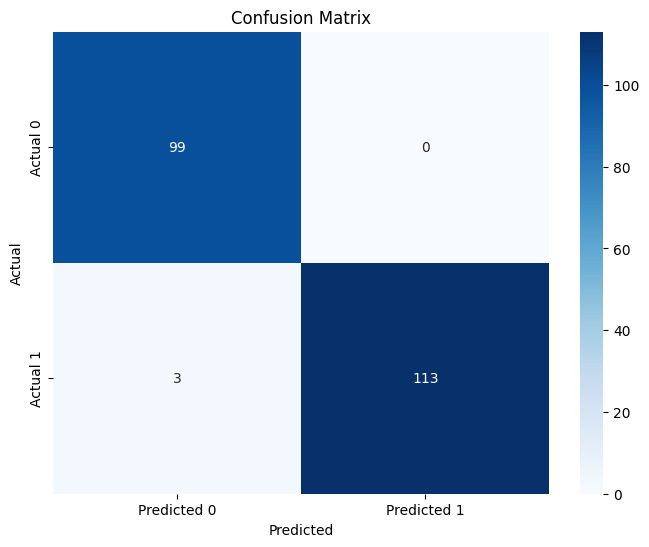

In [47]:
y_pred = modelRelu.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Third model

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.01)

# Definir la arquitectura de la red
thirdModel = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(units=128, activation="leaky_relu"),
    tf.keras.layers.Dense(units=64, activation="leaky_relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=64, activation="leaky_relu"),
    tf.keras.layers.Dense(units=32, activation="leaky_relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=32, activation="leaky_relu"),
    tf.keras.layers.Dense(units=16, activation="leaky_relu"),
    tf.keras.layers.Dense(units=8, activation="leaky_relu"),

    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Métrica a monitorear
    factor=0.1,         # Factor de reducción (nuevo_lr = lr * factor)
    patience=3,         # Número de epochs sin mejora antes de reducir
    min_lr=1e-9,        # Learning rate mínimo
    verbose=1           # Muestra mensajes
)

# Compilar el modelo
thirdModel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])

#early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# training
history = thirdModel.fit(X_train, y_train, epochs=75, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.7762 - loss: 0.4271 - val_accuracy: 0.5000 - val_loss: 1.8588 - learning_rate: 0.0100
Epoch 2/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9631 - loss: 0.1661 - val_accuracy: 0.5000 - val_loss: 6.4557 - learning_rate: 0.0100
Epoch 3/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9598 - loss: 0.0949 - val_accuracy: 0.5000 - val_loss: 8.0341 - learning_rate: 0.0100
Epoch 4/75
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.9844 - loss: 0.1048
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9777 - loss: 0.0885 - val_accuracy: 0.5000 - val_loss: 6.2077 - learning_rate: 0.0100
Epoch 5/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9676 - loss: 0.0792 - val_accuracy: 0.5000 - val_loss: 5.0629 - learning_rate: 1.0000e-03
Epoch 6/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9676 - loss: 0.0764 - val_accuracy: 0.

In [ ]:
loss, accuracy = thirdModel.evaluate(X_train, y_train, verbose=0)
print(f"Train Loss: {loss:.4f}")
print(f"Train Accuracy: {accuracy:.4f}")

Train Loss: 0.0605
Train Accuracy: 0.9860


In [ ]:
loss, accuracy = thirdModel.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0713
Test Accuracy: 0.9814


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


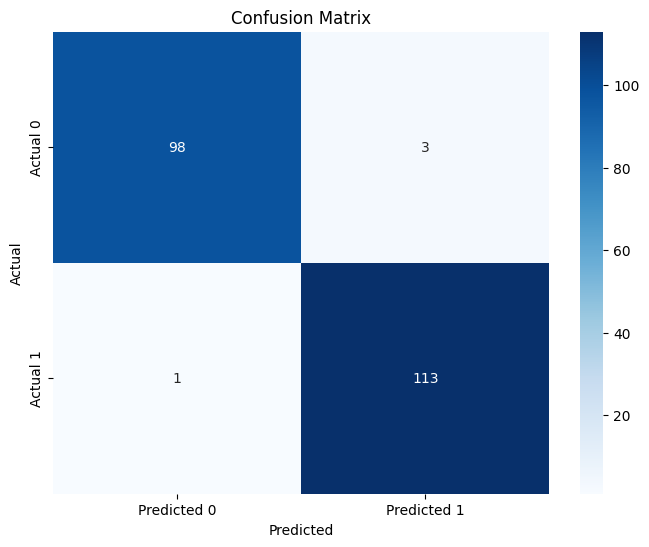

In [ ]:
y_pred = thirdModel.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
